In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astropy.stats import mad_std
import pyregion
from utils import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Open SExtractor catalog
Tab_SE = Table.read("./A2465C/SE_deep/A2465C_deep.cat",format="ascii.sextractor")
name = 'A2465C'
Tab_SE

NUMBER,EXT_NUMBER,FLUX_ISO,FLUXERR_ISO,FLUX_AUTO,FLUXERR_AUTO,FLUX_PETRO,FLUXERR_PETRO,KRON_RADIUS,PETRO_RADIUS,BACKGROUND,THRESHOLD,XMIN_IMAGE,YMIN_IMAGE,XMAX_IMAGE,YMAX_IMAGE,XPEAK_IMAGE,YPEAK_IMAGE,X_IMAGE,Y_IMAGE,X_WORLD,Y_WORLD,ALPHA_J2000,DELTA_J2000,A_IMAGE,B_IMAGE,THETA_IMAGE,MU_MAX,FLAGS,CLASS_STAR
,,ct,ct,ct,ct,ct,ct,,,ct,ct,pix,pix,pix,pix,pix,pix,pix,pix,deg,deg,deg,deg,pix,pix,deg,mag / arcsec2,,
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64
1,1,-2341.436,7.049845,-5937.213,11.22612,-5937.213,11.22612,0.0,0.0,0.2326557,3.996886,873,6,900,6,874,6,885.756,6.0,339.90357851,-5.8481983748,339.9035785,-5.8481984,7.862,0.289,-0.0,99.0,3,0.019
2,1,-2090.568,6.661477,-5184.609,10.4905,-5184.609,10.4905,0.0,0.0,0.204339,3.996886,848,5,872,5,863,5,859.4481,5.0,339.90595815,-5.8482713108,339.9059581,-5.8482713,6.933,0.289,-0.0,99.0,2,0.019
3,1,-2257.814,6.92281,-5853.591,11.14678,-5853.591,11.14678,0.0,0.0,0.2655066,3.996886,901,7,927,7,902,7,913.4497,7.0,339.90107355,-5.8481263246,339.9010735,-5.8481263,7.613,0.289,-0.0,99.0,3,0.019
4,1,-585.3591,3.524922,-1254.341,5.159958,-1254.341,5.159958,0.0,0.0,-63.94151,3.996886,56,4,62,4,59,4,58.9294,4.0,339.97834865,-5.8478385201,339.9783487,-5.8478385,1.841,0.289,0.0,99.0,0,0.019
5,1,-2341.436,7.049845,-6020.836,11.3049,-6020.836,11.3049,0.0,0.0,0.1834197,3.996886,928,8,955,8,929,8,940.78,8.0,339.89860145,-5.8480540286,339.8986014,-5.848054,7.95,0.289,-0.0,99.0,3,0.019
6,1,-2257.814,6.92281,-5853.591,11.14678,-5853.591,11.14678,0.0,0.0,-0.04022264,3.996886,956,9,982,9,957,9,968.2686,9.0,339.89611504,-5.8479818239,339.896115,-5.8479818,7.65,0.289,-0.0,99.0,3,0.019
7,1,-2341.436,7.049845,-6020.836,11.3049,-6020.836,11.3049,0.0,0.0,-0.2494183,3.996886,983,10,1010,10,984,10,995.7785,10.0,339.8936267,-5.8479096221,339.8936267,-5.8479096,7.963,0.289,-0.0,99.0,3,0.019
8,1,-2257.814,6.92281,-5853.591,11.14678,-5853.591,11.14678,0.0,0.0,-0.2946295,3.996886,1011,11,1037,11,1012,11,1023.2836,11.0,339.8911388,-5.8478374062,339.8911388,-5.8478374,7.636,0.289,-0.0,99.0,3,0.019


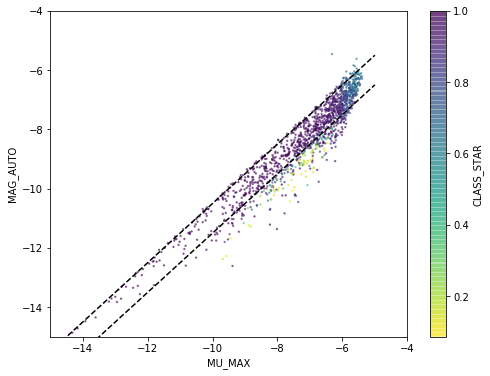

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(Tab_SE["MU_MAX"],-2.5*np.log10(Tab_SE["FLUX_AUTO"]),c=Tab_SE["CLASS_STAR"],s=2, cmap='viridis_r',alpha=0.5)
xx = np.linspace(-15,-5,100)
plt.plot(xx, xx-1.5, 'k--')
plt.plot(xx, xx-.5, 'k--')
plt.xlabel("MU_MAX")
plt.ylabel("MAG_AUTO")
plt.xlim(-15,-4)
plt.ylim(-15,-4)
cb = plt.colorbar()
cb.set_label("CLASS_STAR")

In [4]:
star_cond =((abs(-2.5*np.log10(Tab_SE["FLUX_AUTO"])-Tab_SE["MU_MAX"]  + 1.))<0.5)&(Tab_SE['CLASS_STAR']>0.8)
Tab_gal  = Tab_SE[~star_cond]
Tab_gal

NUMBER,EXT_NUMBER,FLUX_ISO,FLUXERR_ISO,FLUX_AUTO,FLUXERR_AUTO,FLUX_PETRO,FLUXERR_PETRO,KRON_RADIUS,PETRO_RADIUS,BACKGROUND,THRESHOLD,XMIN_IMAGE,YMIN_IMAGE,XMAX_IMAGE,YMAX_IMAGE,XPEAK_IMAGE,YPEAK_IMAGE,X_IMAGE,Y_IMAGE,X_WORLD,Y_WORLD,ALPHA_J2000,DELTA_J2000,A_IMAGE,B_IMAGE,THETA_IMAGE,MU_MAX,FLAGS,CLASS_STAR
,,ct,ct,ct,ct,ct,ct,,,ct,ct,pix,pix,pix,pix,pix,pix,pix,pix,deg,deg,deg,deg,pix,pix,deg,mag / arcsec2,,
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64
1,1,-2341.436,7.049845,-5937.213,11.22612,-5937.213,11.22612,0.0,0.0,0.2326557,3.996886,873,6,900,6,874,6,885.756,6.0,339.90357851,-5.8481983748,339.9035785,-5.8481984,7.862,0.289,-0.0,99.0,3,0.019
2,1,-2090.568,6.661477,-5184.609,10.4905,-5184.609,10.4905,0.0,0.0,0.204339,3.996886,848,5,872,5,863,5,859.4481,5.0,339.90595815,-5.8482713108,339.9059581,-5.8482713,6.933,0.289,-0.0,99.0,2,0.019
3,1,-2257.814,6.92281,-5853.591,11.14678,-5853.591,11.14678,0.0,0.0,0.2655066,3.996886,901,7,927,7,902,7,913.4497,7.0,339.90107355,-5.8481263246,339.9010735,-5.8481263,7.613,0.289,-0.0,99.0,3,0.019
4,1,-585.3591,3.524922,-1254.341,5.159958,-1254.341,5.159958,0.0,0.0,-63.94151,3.996886,56,4,62,4,59,4,58.9294,4.0,339.97834865,-5.8478385201,339.9783487,-5.8478385,1.841,0.289,0.0,99.0,0,0.019
5,1,-2341.436,7.049845,-6020.836,11.3049,-6020.836,11.3049,0.0,0.0,0.1834197,3.996886,928,8,955,8,929,8,940.78,8.0,339.89860145,-5.8480540286,339.8986014,-5.848054,7.95,0.289,-0.0,99.0,3,0.019
6,1,-2257.814,6.92281,-5853.591,11.14678,-5853.591,11.14678,0.0,0.0,-0.04022264,3.996886,956,9,982,9,957,9,968.2686,9.0,339.89611504,-5.8479818239,339.896115,-5.8479818,7.65,0.289,-0.0,99.0,3,0.019
7,1,-2341.436,7.049845,-6020.836,11.3049,-6020.836,11.3049,0.0,0.0,-0.2494183,3.996886,983,10,1010,10,984,10,995.7785,10.0,339.8936267,-5.8479096221,339.8936267,-5.8479096,7.963,0.289,-0.0,99.0,3,0.019
8,1,-2257.814,6.92281,-5853.591,11.14678,-5853.591,11.14678,0.0,0.0,-0.2946295,3.996886,1011,11,1037,11,1012,11,1023.2836,11.0,339.8911388,-5.8478374062,339.8911388,-5.8478374,7.636,0.289,-0.0,99.0,3,0.019


In [5]:
region_str = "\n".join(["circle(%.4f,%.4f,%.1f)"%(gal["X_IMAGE"],gal["Y_IMAGE"], gal["PETRO_RADIUS"]) for gal in Tab_gal])
region_str = "# Region file format: DS9 version 4.1\nglobal color=magenta dashlist=8 3 width=1\nimage\n"+region_str
regs = pyregion.parse(region_str)
# regs.write('./%s/%s_emission_Liu_gau_SNb.reg'%(name, name))

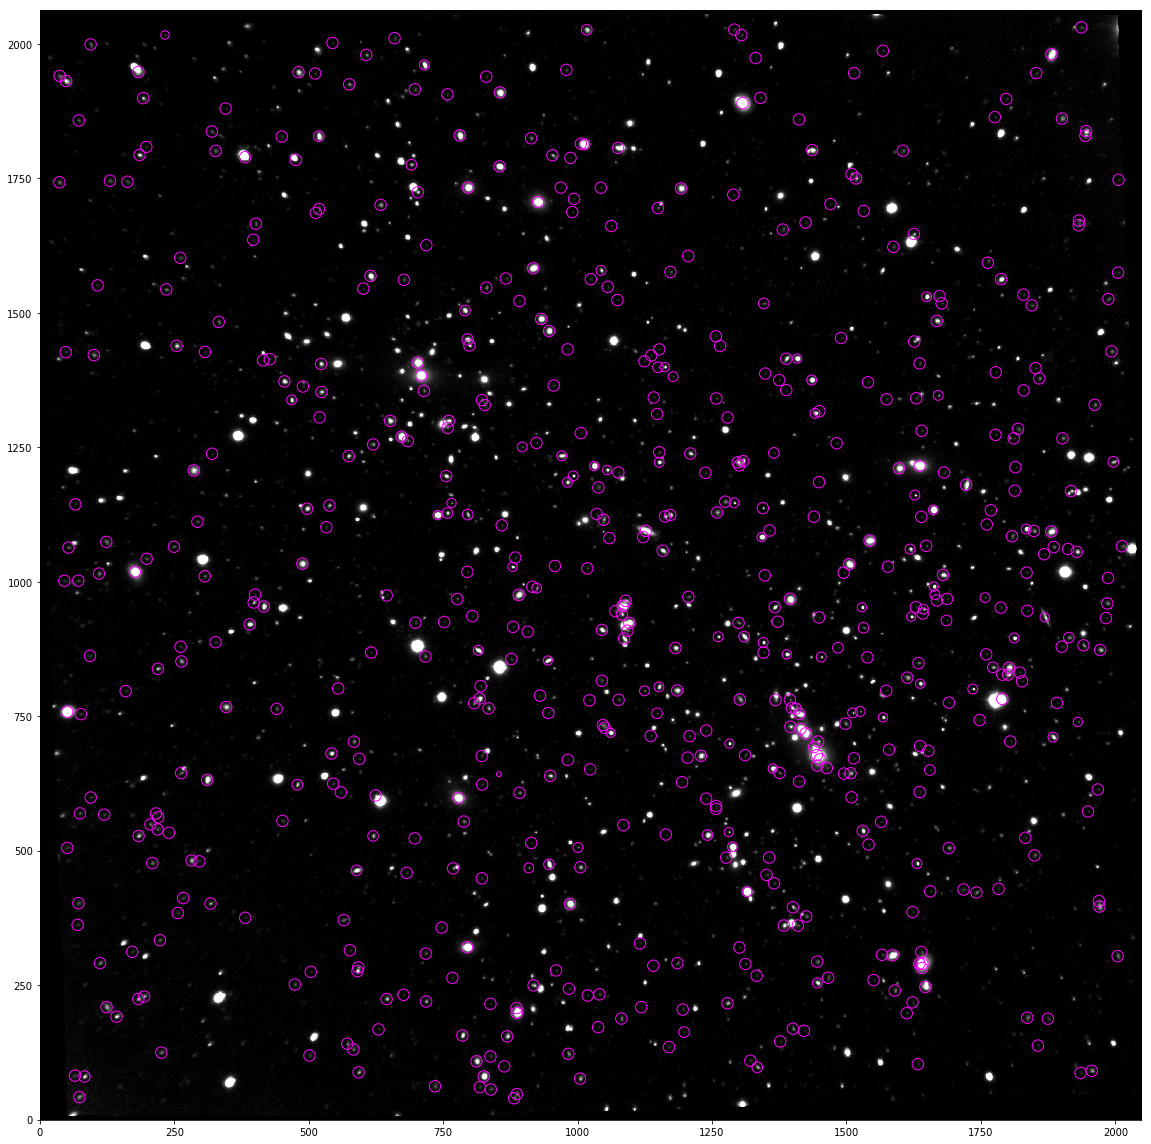

In [6]:
hdu_field = fits.open('/home/qliu/Desktop/Cluster/%s/SE_deep/%s_deep.fits'%(name,name))
stack_field = hdu_field[0].data

plt.figure(figsize=(16,16))
ax = plt.subplot(111)
ax.imshow(stack_field,vmin=0.001,vmax=100,origin="lower",cmap="gray")

patch_list, artist_list = regs.get_mpl_patches_texts()
for p in patch_list:
    ax.add_patch(p)
plt.tight_layout()
# plt.savefig("./%s/fig/%s_emission_Liu_gau_SNa.pdf"%(name,name),dpi=300)

In [115]:
hdu_field[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2064                                                  
PROGRAM = 'ORB v3.4'           / Thomas Martin: thomas.martin.1@ulaval.ca       
DATE    = '2019-01-23'         / Creation date                                  
MASK    = 'False   '                                                            
COMMENT                                                                         
COMMENT General                                                                 
COMMENT -------                                                                 
COMMENT                                                                         
FILETYPE= 'Deep Frame'      

In [7]:
from astropy.wcs import WCS
wcs = WCS(hdu_field[0].header)
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 339.885416667  -5.75611111111  
CRPIX : 1079.25968262  1031.05512298  
CD1_1 CD1_2  : -8.99583222873e-05  -6.43937995457e-07  
CD2_1 CD2_2  : -6.43937995457e-07  8.99583222873e-05  
NAXIS : 2048  2064

In [8]:
from astropy.coordinates import SkyCoord, ICRS, FK5
ra_0, dec_0 = (hdu_field[0].header['CRVAL1'], hdu_field[0].header['CRVAL2'])
coord_0 = SkyCoord(ra_0, dec_0, frame=FK5, unit="deg")
print(coord_0.to_string('hmsdms'))

coord_BGC1 = SkyCoord("22h39m40.491s", "−5d43m26.75s", frame=FK5)
coord_BGC2 = SkyCoord("22h39m24.572s", "−5d47m17.37s", frame=FK5)

22h39m32.5s -05d45m22s


In [9]:
import pandas as pd
Clus1 = pd.read_csv("./A2465C/A2465a.csv")
Clus2 = pd.read_csv("./A2465C/A2465b.csv")
coord_1 = SkyCoord(Clus1["RA"], Clus1["DEC"], frame=FK5, unit="deg")
coord_2 = SkyCoord(Clus2["RA"], Clus2["DEC"], frame=FK5, unit="deg")
pos_1 = np.array(coord_1.to_pixel(wcs, origin=1)).T
pos_2 = np.array(coord_2.to_pixel(wcs, origin=1)).T
pos_BCG1 = np.array(coord_BGC1.to_pixel(wcs, origin=1)).T
pos_BCG2 = np.array(coord_BGC2.to_pixel(wcs, origin=1)).T

In [10]:
(pos_BCG1[0],pos_BCG1[1]), (pos_BCG2[0],pos_BCG2[1])

((709.7653757488353, 1382.7950577320905),
 (1446.0197273122617, 678.7877197706409))

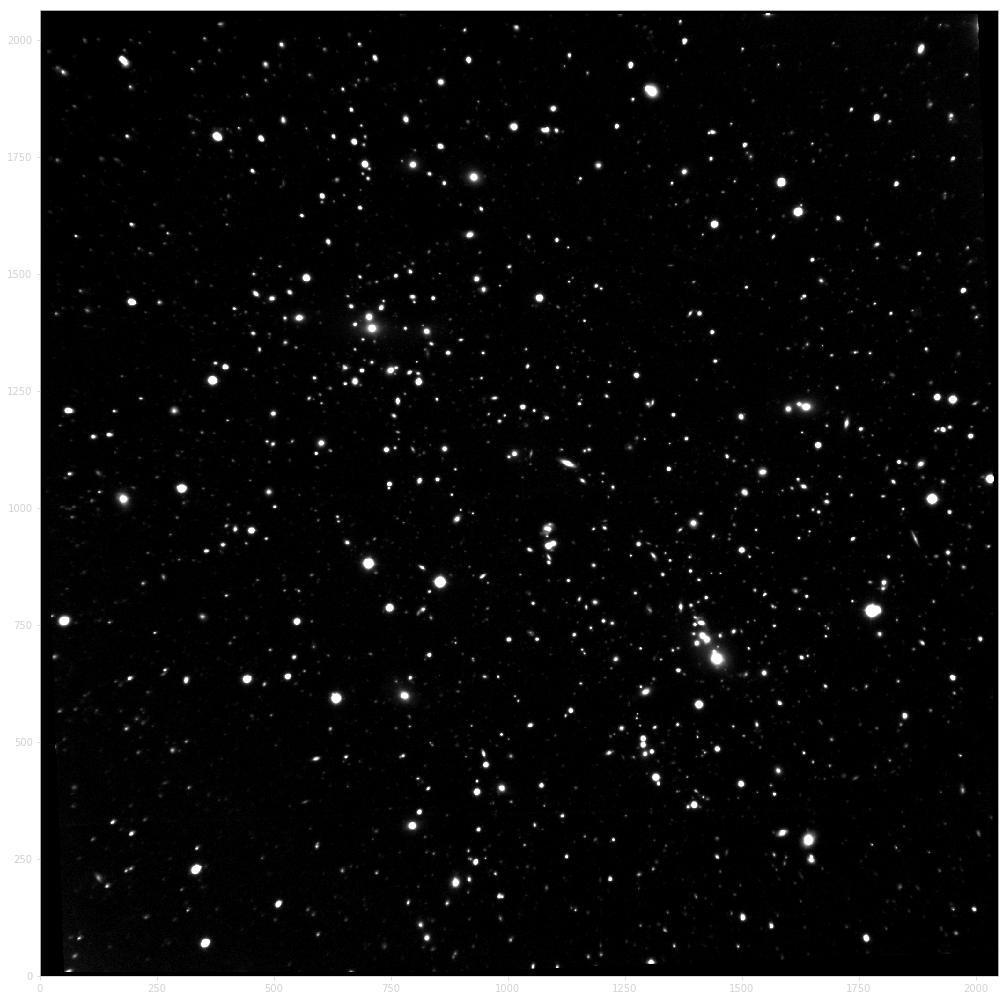

In [15]:
region_str1 = "\n".join(["circle(%.3f,%.3f,10)"%(p[0],p[1]) for p in pos_1])
region_str1 = "# Region file format: DS9 version 4.1\nglobal color=red dashlist=8 3 width=2\nimage\n"+region_str1
region_str1 = region_str1 + "\ncircle(%.3f,%.3f,20) # width=3"%(pos_BCG1[0],pos_BCG1[1])
regs1 = pyregion.parse(region_str1)

region_str2 = "\n".join(["circle(%.3f,%.3f,10)"%(p[0],p[1]) for p in pos_2])
region_str2 = "# Region file format: DS9 version 4.1\nglobal color=cyan dashlist=8 3 width=2\nimage\n"+region_str2
region_str2 = region_str2 + "\ncircle(%.3f,%.3f,20) # width=3"%(pos_BCG2[0],pos_BCG2[1])
regs2 = pyregion.parse(region_str2)

plt.figure(figsize=(10,10))
ax = plt.subplot(111)
ax.imshow(stack_field,vmin=0.001,vmax=100,origin="lower",cmap="gray")

# patch_list1, _ = regs1.get_mpl_patches_texts()
# patch_list2, _ = regs2.get_mpl_patches_texts()
# for p in np.concatenate([patch_list1, patch_list2]):
#     ax.add_patch(p)
# plt.tight_layout()

In [12]:
X = np.vstack([pos_1, pos_2])
y = np.concatenate([np.ones(len(pos_1)), 2*np.ones(len(pos_2))])

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

clf = LinearSVC()
scores = cross_val_score(clf, X, y, cv=5)
print(scores)

clf.fit(X_train, y_train)

X0, X1 = X[:, 0], X[:, 1]
yy, xx = np.indices(stack_field.shape)+1
yy = yy[::-1]

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

[0.94736842 1.         1.         0.94444444 1.        ]


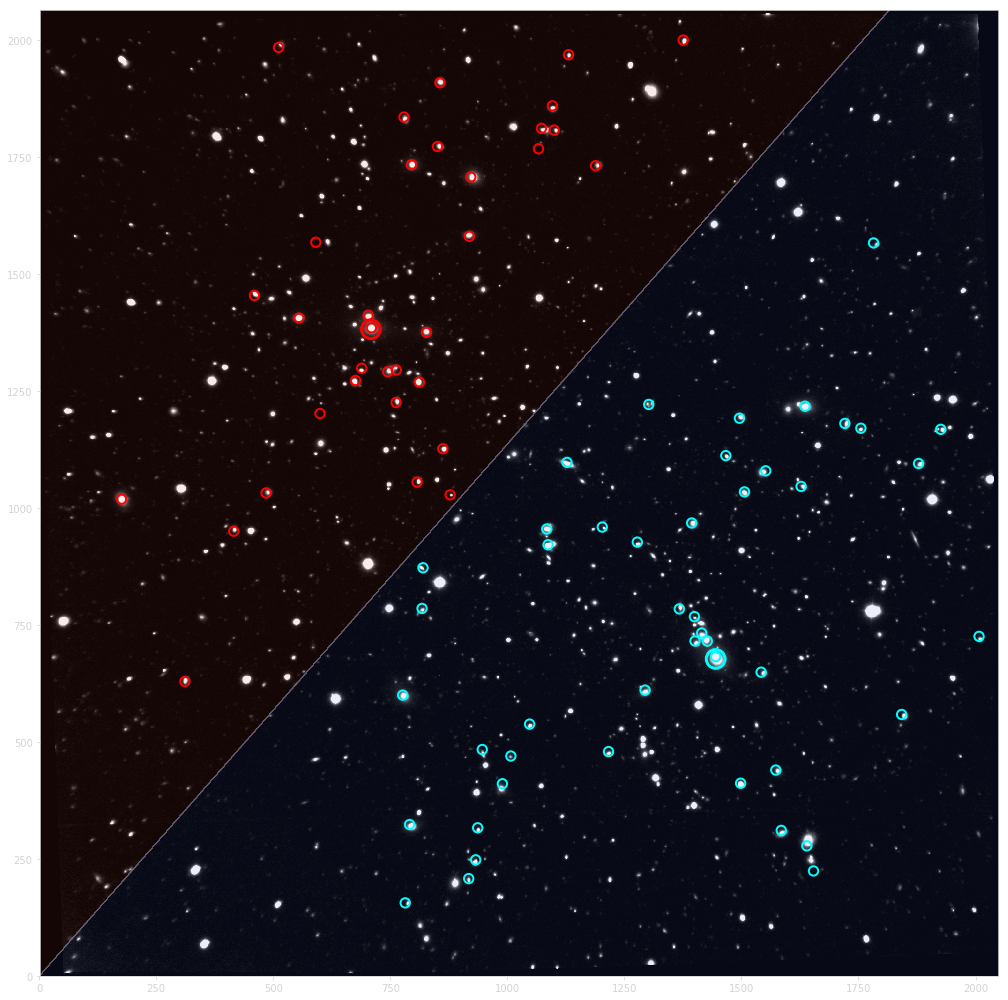

In [16]:
plt.figure(figsize=(14,14))
ax = plt.subplot(111)
ax.imshow(stack_field,vmin=0.001,vmax=100,origin="lower",cmap="gray")

patch_list1, _ = regs1.get_mpl_patches_texts()
patch_list2, _ = regs2.get_mpl_patches_texts()
for p in np.concatenate([patch_list1, patch_list2]):
    ax.add_patch(p)
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm_r, alpha=0.1)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
plt.tight_layout()
plt.savefig("./A2465C/fig/Cluster_Boundary.pdf",dpi=150)

In [279]:
hdu_bound = fits.PrimaryHDU(Z)
hdu_bound.writeto('./A2465C/A2465C_bound.fits')

In [5]:
hdu = fits.open('/home/qliu/data/A2465C_cube.fits')
hdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2064                                                  
NAXIS3  =                   95                                                  
DATE    = '2019-01-29'         / Creation date                                  
MASK    = 'False   '                                                            
FILETYPE= 'Calibrated Spectrum Cube' / Type of file                             
OBSERVAT= 'CFHT    '           / Observatory name                               
TELESCOP= 'CFHT 3.6m'          / Hawaii Big Island, Mauna Kea                   
INSTRUME= 'SITELLE '           / Instrument Name                                
ORBSVER = '' / ORBS version 

In [57]:
import astropy.units as u
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord, ICRS, FK5
w = WCS(hdu[0].header,naxis=2)
w

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 339.885416667  -5.75611111111  
CRPIX : 1077.08705104  1033.22775456  
CD1_1 CD1_2  : -8.9887277796399e-05  -6.50762230172e-07  
CD2_1 CD2_2  : -6.50762230172e-07  8.98872777963999e-05  
NAXIS : 2048  2064  95

In [45]:
Tab_SE = Table.read("./A2465C/SE/A2465C_run2.cat",format="ascii.sextractor")
id=1000
Tab_SE[id]

NUMBER,EXT_NUMBER,FLUX_ISO,FLUXERR_ISO,FLUX_AUTO,FLUXERR_AUTO,FLUX_PETRO,FLUXERR_PETRO,KRON_RADIUS,PETRO_RADIUS,BACKGROUND,THRESHOLD,XMIN_IMAGE,YMIN_IMAGE,XMAX_IMAGE,YMAX_IMAGE,XPEAK_IMAGE,YPEAK_IMAGE,X_IMAGE,Y_IMAGE,X_WORLD,Y_WORLD,ALPHA_J2000,DELTA_J2000,A_IMAGE,B_IMAGE,THETA_IMAGE,MU_MAX,FLAGS,CLASS_STAR
,,ct,ct,ct,ct,ct,ct,,,ct,ct,pix,pix,pix,pix,pix,pix,pix,pix,deg,deg,deg,deg,pix,pix,deg,mag / arcsec2,,
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64
1001,1,724.9757,31.18896,733.8713,31.46847,754.4937,32.17282,3.5,4.62,-0.03549538,0.3708442,540,1402,561,1415,550,1408,550.3965,1408.2759,339.93275122,-5.722054367,339.9327512,-5.7220544,3.129,2.292,6.06,-5.9864,0,0.276


In [73]:
Tab_SE["X_IMAGE"][576]

1081.3789

In [69]:
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (339.93275122, -5.72205437)>

In [86]:
ra1,dec1=w.all_pix2world(Tab_SE["X_IMAGE"][id],Tab_SE["Y_IMAGE"][id],1)
coord1 = SkyCoord(ra1, dec1, frame='icrs', unit="deg")
print(coord1.to_string('hmsdms'))

22h39m43.8557s -05d43m19.0708s


In [67]:
ra2,dec2=w.all_pix2world(Tab_SE["X_IMAGE"][907],Tab_SE["Y_IMAGE"][907],1)
coord2 = SkyCoord(ra2, dec2, frame='icrs', unit="deg")
print(coord2.to_string('hmsdms'))

22h39m42.4701s -05d42m26.8535s


In [68]:
c1 = SkyCoord(ra1, dec1, frame='icrs', unit="deg")
c2 = SkyCoord(ra2, dec2, frame='icrs', unit="deg")
c1.position_angle(c2).to(u.deg)  

<Angle 338.45099177 deg>

In [87]:
SkyCoord(coord1.ra, coord1.dec, frame='icrs', unit="deg")

<SkyCoord (ICRS): (ra, dec) in deg
    (339.93273228, -5.7219641)>

In [88]:
w.all_world2pix(coord1.ra, coord1.dec, 1)

[array(550.39649939), array(1408.27590031)]

In [97]:
print("%.3f"%coord1.ra.value)

339.933


In [94]:
coord1.ra

<Longitude 339.93273228 deg>